In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import collections

In [ ]:
class preprocessData:
    
    df = pd.DataFrame()
    
    def __init__(self):
        self.df = pd.read_csv('../../data/raw/Full_corpus_fromClientFolder.csv')
        self.df['no_pages'] = self.df['no_pages'].astype(int)
        
    def readrawdata(self,filename):
        self.df = pd.DataFrame(filename)
    
    def getdataframe(self):
        return(self.df)
    
    def remove_noun(self,sentence):
        tagged_sentence = nltk.tag.pos_tag(sentence)
        edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
        return (' '.join(edited_sentence))

    def remove_stop_punc(self,text):
        
        # Remove punctuations from the text
        
        remove = string.punctuation
        remove = remove.replace("?", "")
        cleaned_text = text.translate(None, remove)
        # Converting all upper cases to lower cases
        cleaned_text = [word.lower() for word in cleaned_text.split()]
        # Removing stopwords (takes a relatively longer amount of time)
        return ' '.join([word for word in cleaned_text if word not in stopwords.words('english')])

    #remove non-english words.
    def remove_nonenglishWords(self,sentence):
        words = set(nltk.corpus.words.words())
        return(" ".join(w for w in nltk.wordpunct_tokenize(sentence) if w.lower() in words 
                        or not w.isalpha()))
    
    def cleancontent(self):
        self.df['content']=self.df['content'].apply(lambda x: self.remove_nonenglishWords(x) )
        self.df['content']=self.df['content'].apply(lambda x: self.remove_stop_punc(x) )
    
    def getUniqueWordCount(self):
        self.df['no_words'] = self.df['content'].apply(lambda x: len(collections.Counter(x.split()) ) )
    
    def questionmarkcount(self):
        self.df['ques_cnt'] = self.df['content'].apply(lambda x : collections.Counter(x)['?'] )
    
    def removedigit(self):
        self.df['content'] = self.df['content'].apply(lambda x:  x.translate(None, string.digits))
    
    def removeshortwords(self):
        length=2
        shortwordlist = self.getallshortwords()
        self.df['content'] = self.df['content'].apply(lambda x: ' '.join([token for token in x.split(' ') if (token not in shortwordlist)]))
        
    def getshortwords(self,sent,leng=2):
        return([x for x in sent.split() if ( (len(x) <= leng) & (x != '?') )])  
           
    def getallshortwords(self):
        allwords = []
        allwords.append(self.df['content'].apply(lambda x: self.getshortwords(x)))
        return(set(sum(sum(allwords,[]),[])))

In [ ]:
pre = preprocessData()
pre.cleancontent()
pre.questionmarkcount()
pre.removedigit()
pre.removeshortwords()
pre.getUniqueWordCount()
new_df = pre.getdataframe()
new_df.drop('Unnamed: 0',inplace=True,axis=1)
#new_df.drop(new_df[new_df['no_words'] < 25].index,inplace=True)

In [ ]:
new_df.to_csv("../../data/processed/processed_corpus.csv")

In [4]:
new_df['cat'] = np.where( new_df['cat'] == 'Clinic/Doctors office', 'Clinic/Doctors Office',new_df['cat'])

new_df['subcat'] = np.where( new_df['subcat'] == 'Nurse/Notes/TelephoneLogs', 'Nurses/Notes/TelephoneLogs',new_df['subcat'])

new_df['subcat'] = np.where( new_df['subcat'] == 'X/Ray/MRIs/CTScans/RadiologyQuestionnaires', 'X-Rays/MRIs/CTscansRadiologyQuestionnaries',new_df['subcat']) 

In [5]:
new_df['subcat'] = np.where( new_df['subcat'] == 'X-Rays/MRIs/CTscansRadiologyQuestionnaires', 'X-Rays/MRIs/CTscansRadiologyQuestionnaries',new_df['subcat'])                                                   

Before cleaning - The maximum and minimum words for each page is 1189,7
After removing the stopwords, punc and non-english words, the max,min words in the content - 532, 4

The number of pages of each document - 'no_pages', max - 13 min -1

In [7]:
def drawpiechart(drawlist,labelname):
    
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_subplot(111)
    #cat = raw_data['cat'].value_counts()
    cat  = drawlist.value_counts()
    plt.axis('equal');
    pie_wedge_collection = ax.pie(cat, labels=cat.index,autopct='%1.1f%%')
    ax.set_title(labelname)

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        

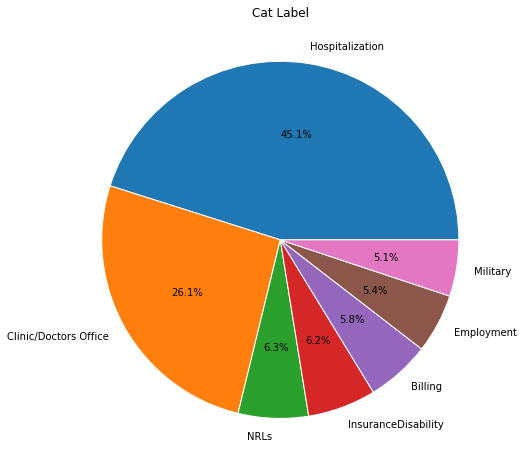

In [8]:
drawpiechart(new_df['cat'],'Cat Label')

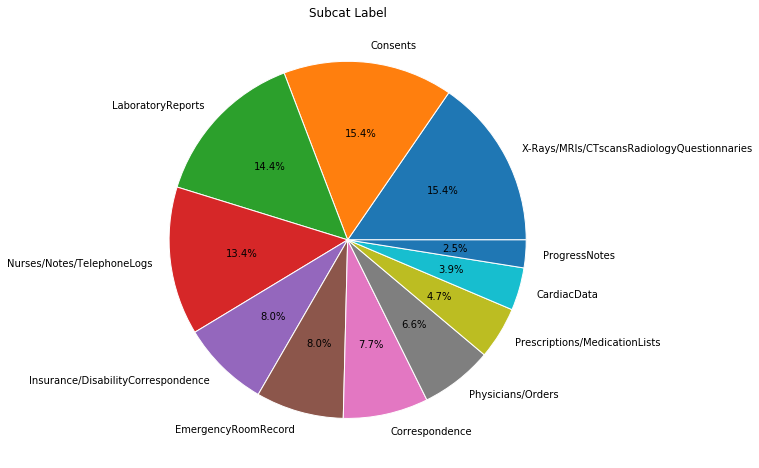

In [9]:
drawpiechart(new_df['subcat'],'Subcat Label')

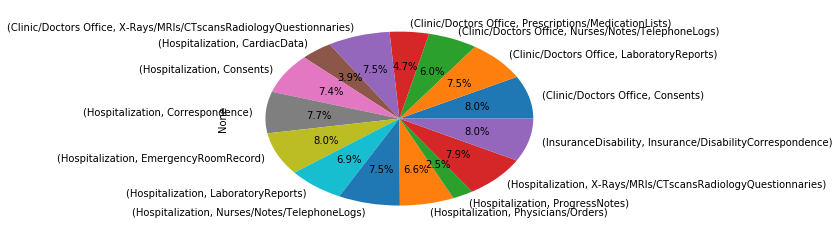

In [10]:
new_df[['cat','subcat']].groupby(['cat','subcat']).size().plot(kind='pie',autopct='%1.1f%%')

In [11]:
new_df.subcat.unique()

array(['Insurance/DisabilityCorrespondence', 'LaboratoryReports',
       'X-Rays/MRIs/CTscansRadiologyQuestionnaries', 'Consents', nan,
       'ProgressNotes', 'Nurses/Notes/TelephoneLogs',
       'EmergencyRoomRecord', 'Prescriptions/MedicationLists',
       'CardiacData', 'Physicians/Orders', 'Correspondence'], dtype=object)

#### Label Distribution of raw dataset 

In [12]:
fullcorpus = pd.read_csv("../../data/raw/Full_corpus_fromClientFolder.csv")

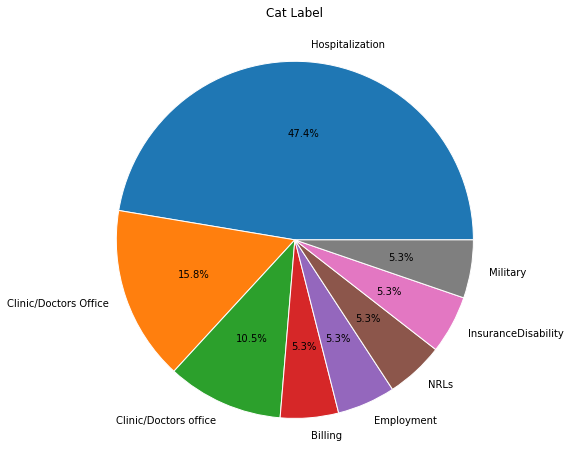

In [13]:
drawpiechart(fullcorpus['cat'],'Cat Label')

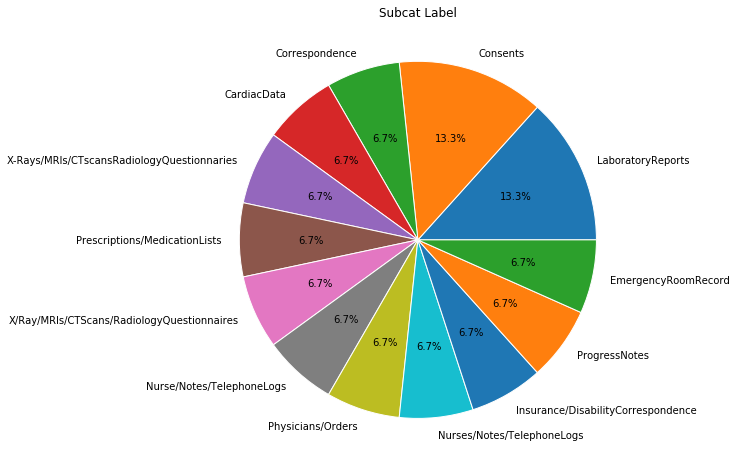

In [14]:
drawpiechart(fullcorpus['subcat'],'Subcat Label')

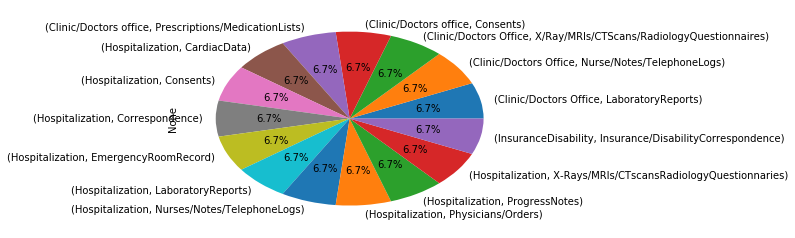

In [15]:
fullcorpus[['cat','subcat']].groupby(['cat','subcat']).size().plot(kind='pie',autopct='%1.1f%%')